In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import math
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

import keras
from keras import Sequential
from keras import layers
import tensorflow as tf
from keras.preprocessing import image_dataset_from_directory
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D,  MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

from PIL import Image
from google.colab import drive
import io

drive.mount('/content/drive/')
root = "/content/drive/MyDrive/Colab_Notebooks/CNN/Alzheimer_MRI_Disease_Classification_Dataset/"
df_train = pd.read_parquet(root + "train.parquet")
df_test = pd.read_parquet(root + "test.parquet")

Mounted at /content/drive/


Veriyi Anlamak

In [2]:
print(df_train.head())
print(df_test.head())

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      2
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      3
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0


In [3]:
print(df_train.shape)
print(df_test.shape)

(5120, 2)
(1280, 2)


In [4]:
df_train_images = df_train["image"].values
df_test_images = df_test["image"].values

df_train_labels = df_train["label"].values
df_test_labels = df_test["label"].values

In [5]:
print(df_train_images[0])

{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xc0\x00\x0b\x08\x00\x80\x00\x80\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x03\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x07\x05\x06\x08\x04\x02\x03\x01\t\xff\xc4\x008\x10\x00\x01\x03\x03\x03\x02\x05\x03\x01\x05\x08\x03\x00\x00\x00\x00\x01\x02\x03\x04\x00\x05\x11\x06\x07\x12!1\x13"AQa\x142q\x81\x08\x15R\x91\xa1#$3Bb\x92\xb1\xd1\x16r\x82\xff\xda\x00\x08\x01\x01\x00\x00?\x00\xfeUQE\x14QE\x14QE\x14QE\x14QE\x14W\xea\x1bS\x8bJ\x12\x92\xa5(\xe0$\x0c\x92\x7f\x157\x07BjK\x9a\x1c\\;\x05\xceRZ\xfb\xd4\xd4G\x14\x13\xf9\xc0\xe9\xd8\xd4l\xfbL\xdbZ\xf8\xcc\x86\xfcU{<\xd9G\xcf\xadu\xda\xb4\x95\xee\xfaH\xb6\xd9\xe7O\xc63\xf4\xd1\x96\xe63\xdb\xb0\xae\x

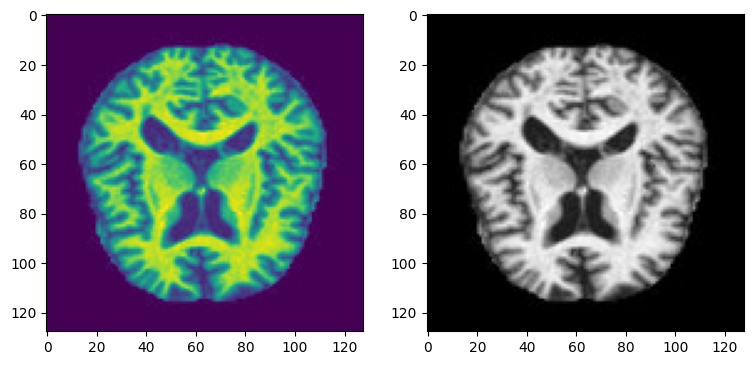

image_label: [0. 1. 0. 0.]
image.shape: (128, 128)


In [45]:
index = 11
# Byte verisinin resme dönüştürülmesi
image_byte =  df_train_images[index]["bytes"]
image = Image.open(io.BytesIO(image_byte))

image_label = df_train["label"][index]

plt.figure(figsize=(9,7))
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(image, cmap="gray")
plt.show()

#Label için kategorik dönüşüm
num_classes = 4  # Toplam sınıf sayısı
image_label = to_categorical(image_label, num_classes=num_classes)


print(f"image_label: {image_label}")
print(f"image.shape: {np.array(image).shape}")  #giriş görüntü boyutu

*   x_train, x_test, y_train, y_test array'lerinin oluşturulması
*   Normalizasyon yapılması
*   Kategorik dönüşümün yapılması

In [ ]:
x_train = []
y_train = []
for i in range(len(df_train_images)):
  image_byte =  df_train_images[i]["bytes"]
  image = Image.open(io.BytesIO(image_byte))
  image = image.convert('L')

  image_label = df_train["label"][i]

  x_train.append(np.array(image))
  y_train.append(image_label)

x_test = []
y_test = []
for j in range(len(df_test_images)):
  image_byte =  df_train_images[j]["bytes"]
  image = Image.open(io.BytesIO(image_byte))
  image = image.convert('L')

  image_label = df_train["label"][j]

  x_test.append(np.array(image))
  y_test.append(image_label)


# Dizilerin numpy array'ine dönüştürülmesi
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Normalizasyon
x_train = x_train / 255.0
x_test = x_test / 255.0


# One-hot encode the labels (Kategorik Dönüşümün Yapılması)
num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

Modelin Oluşturulması

In [ ]:
model = Sequential()

#1. KATMAN :  32 filtre uygulaması, 3x3 kernel size, giriş görüntüsü 128 x 128 boyutunda
model.add(Conv2D(32, 3, input_shape=(128,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. KATMAN : 32 filtre uygulaması, 3x3 kernel size
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling : 2x2 pencere boyutu, kaydırma adım sayısı 2
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.3))

#3. KATMAN : 32 filtre uygulaması, 3x3 kernel size
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

#4. KATMAN : 32 filtre uygulaması, 3x3 kernel size
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
# Pooling : 2x2 pencere boyutu, kaydırma adım sayısı 2
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.3))

#TAM BAĞLANTI KATMANI
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))


#Çıkış katmanı
model.add(Dense(4))
model.add(Activation('softmax')) #Sınıflandırma işleminde çıkış katmanında 4 nöron bulunuyor (4 alzheimer sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_24 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_31 (Activation)  (None, 126, 126, 32)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization_25 (Ba  (None, 124, 124, 32)      128       
 tchNormalization)                                               
                                                                 
 activation_32 (Activation)  (None, 124, 124, 32)     

Modelin Eğitilmesi

In [ ]:
# en başarılı ağırlıkların kaydedilmesi
checkpointer = ModelCheckpoint(filepath=root+'alzheimer_classificater.h5' , verbose=1, save_best_only=True)

epochs = 10

# modeli çalıştır

hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# save model to json
model_json = model.to_json()
with open(root + 'alzheimer_classificater.json', 'w') as json_file:
  json_file.write(model_json)

Epoch 1/10

Epoch 1: val_loss improved from inf to 1.80395, saving model to /content/drive/MyDrive/Colab_Notebooks/CNN/Alzheimer_MRI_Disease_Classification_Dataset/alzheimer_classificater.h5
160/160 - 18s - loss: 0.9163 - accuracy: 0.6324 - val_loss: 1.8039 - val_accuracy: 0.4930 - 18s/epoch - 113ms/step
Epoch 2/10

Epoch 2: val_loss improved from 1.80395 to 1.56734, saving model to /content/drive/MyDrive/Colab_Notebooks/CNN/Alzheimer_MRI_Disease_Classification_Dataset/alzheimer_classificater.h5
160/160 - 11s - loss: 0.3987 - accuracy: 0.8473 - val_loss: 1.5673 - val_accuracy: 0.6211 - 11s/epoch - 69ms/step
Epoch 3/10

Epoch 3: val_loss improved from 1.56734 to 1.02460, saving model to /content/drive/MyDrive/Colab_Notebooks/CNN/Alzheimer_MRI_Disease_Classification_Dataset/alzheimer_classificater.h5
160/160 - 11s - loss: 0.2161 - accuracy: 0.9240 - val_loss: 1.0246 - val_accuracy: 0.7422 - 11s/epoch - 69ms/step
Epoch 4/10

Epoch 4: val_loss improved from 1.02460 to 0.12881, saving model

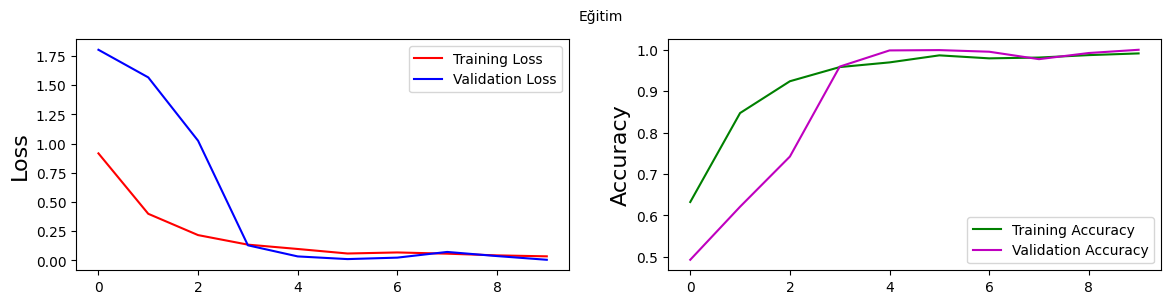

In [ ]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Eğitim', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()